FEATURE SELECTION

In [6]:
import sklearn
%matplotlib inline
import numpy as np
import sklearn.model_selection as ms
import sklearn.cross_validation as cv
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("US_County_Level_Presidential_Results_12-16.csv")
county_facts = pd.read_csv("county_facts.csv")
df08 = pd.read_csv("US_County_Level_Presidential_Results_08-16.csv")

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
ncf = pd.read_csv('PCA-CLUSTER-Data.csv')
ncf = ncf.ix[:,'PST045214':]
ncf = ncf._get_numeric_data()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


In [10]:
ncf_scaled = pd.DataFrame(scaler.fit_transform(ncf), columns=ncf.columns)
ncf_scaled.head()

,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,...,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,Outcome_2016,Outcome_2012
0,0.005467,0.005550,0.205784,0.005550,0.368852,0.514451,0.198770,0.797753,0.772582,0.219741,...,0.000000,0.0,0.005022,0.148552,0.003546,0.003270,0.004072,0.001321,1.0,1.0
1,0.019772,0.018555,0.298109,0.018555,0.336066,0.427746,0.299180,0.790262,0.870351,0.112808,...,0.008331,0.0,0.024905,0.212450,0.017578,0.034548,0.010912,0.001650,1.0,1.0
2,0.002649,0.002788,0.165740,0.002788,0.344262,0.398844,0.254098,0.617978,0.478215,0.559342,...,0.000000,0.0,0.001581,0.078391,0.000000,0.000200,0.006068,0.000446,1.0,0.0
3,0.002216,0.002326,0.169077,0.002326,0.311475,0.393064,0.219262,0.591760,0.755579,0.259694,...,0.000000,0.0,0.001047,0.071832,0.000433,0.000474,0.004265,0.000530,1.0,1.0
4,0.005697,0.005830,0.196885,0.005830,0.377049,0.468208,0.264344,0.764045,0.964931,0.021152,...,0.002018,0.0,0.002684,0.069579,0.000842,0.000075,0.004418,0.001280,1.0,1.0


In [11]:
ncf_x = ncf_scaled.iloc[:,0:51]
ncf_y_16 = ncf_scaled.iloc[:,51]
ncf_y_12 = ncf_scaled.iloc[:,52]

In [2]:
# Lets get it, find a logistical regression

In [4]:
from sklearn import linear_model

logit = linear_model.LogisticRegression()
train_error = []
test_error = []

In [18]:
for i in range(5):
    x_train, x_test, y_train, y_test = ms.train_test_split(ncf_x, ncf_y_12, test_size=1.0/3, random_state=i)
    logit.fit(x_train, y_train)
    train_error.append(1 - logit.score(x_train, y_train))
    test_error.append(1 - logit.score(x_test, y_test))

In [19]:
print('Training Error: {}'.format(np.round(np.array(train_error), 4))) # training error
print('Test Error: {}'.format(np.round(np.array(test_error), 4))) # test error

## calculate the mean of the test error
print('Test Error Mean: {:6f}'.format(np.mean(test_error)))

## calculate the standard deviation of the test errors
print('Test Error SD: {:6f}'.format(np.std(test_error)))

Training Error: [ 0.075   0.0726  0.0826  0.0759  0.0788  0.1261  0.1337  0.1313  0.1347
  0.1309  0.075   0.0726  0.0826  0.0759  0.0788  0.1261  0.1337  0.1313
  0.1347  0.1309]
Test Error: [ 0.0831  0.0831  0.0669  0.084   0.0831  0.1452  0.1251  0.1261  0.1309
  0.1318  0.0831  0.0831  0.0669  0.084   0.0831  0.1452  0.1251  0.1261
  0.1309  0.1318]
Test Error Mean: 0.105922
Test Error SD: 0.026786


In [16]:
for i in range(5):
    x_train, x_test, y_train, y_test = ms.train_test_split(ncf_x, ncf_y_16, test_size=1.0/3, random_state=i)
    logit.fit(x_train, y_train)
    train_error.append(1 - logit.score(x_train, y_train))
    test_error.append(1 - logit.score(x_test, y_test))

In [17]:
print('Training Error: {}'.format(np.round(np.array(train_error), 4))) # training error
print('Test Error: {}'.format(np.round(np.array(test_error), 4))) # test error

## calculate the mean of the test error
print('Test Error Mean: {:6f}'.format(np.mean(test_error)))

## calculate the standard deviation of the test errors
print('Test Error SD: {:6f}'.format(np.std(test_error)))

Training Error: [ 0.075   0.0726  0.0826  0.0759  0.0788  0.1261  0.1337  0.1313  0.1347
  0.1309  0.075   0.0726  0.0826  0.0759  0.0788]
Test Error: [ 0.0831  0.0831  0.0669  0.084   0.0831  0.1452  0.1251  0.1261  0.1309
  0.1318  0.0831  0.0831  0.0669  0.084   0.0831]
Test Error Mean: 0.097294
Test Error SD: 0.025332


In [26]:
logit = linear_model.LogisticRegression()
scores = ms.cross_val_score(estimator=logit, X=ncf_x, y=ncf_y_16, cv=2)

print('Scores: {}'.format(scores))
print('Score mean: {}'.format(scores.mean()))
print('Score std deviation: {}'.format(scores.std()))

Scores: [ 0.92425207  0.90700637]
Score mean: 0.915629219086
Score std deviation: 0.00862284965964


In [22]:
mean_error = []
std_error = []
kfold = range(3, 50)
for i in kfold:
    scores = ms.cross_val_score(logit, ncf_x, ncf_y_16, cv=i)
    mean_error.append(1 - scores.mean())
    std_error.append(scores.std())

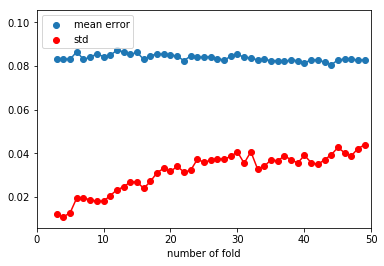

In [23]:
import matplotlib.pyplot as plt
s1 = plt.scatter(kfold, mean_error, label='mean error')
plt.plot(kfold, mean_error)
s2 = plt.scatter(kfold, std_error, color='red', label='std')
plt.plot(kfold, std_error, color='red')
plt.xlim(0, 50)
plt.xlabel('number of fold')
plt.legend(handles=[s1, s2], loc=2)
plt.show()